In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
import sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import joblib
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# 데이터 불러오기
learn_csv_file = pd.read_csv('csv_files/learn_60percent_top_5class.csv')
valid_csv_file = pd.read_csv('csv_files/valid_20percent_top_5class.csv')
test_csv_file = pd.read_csv('csv_files/test_20percent_top_5class.csv')

learn_csv_file = sklearn.utils.shuffle(learn_csv_file)
valid_csv_file = sklearn.utils.shuffle(valid_csv_file)

col = 34

learn_x = learn_csv_file.iloc[:,:col].values
learn_y = learn_csv_file.iloc[:,col:].values
valid_x = valid_csv_file.iloc[:,:col].values
valid_y = valid_csv_file.iloc[:,col:].values
test_x = test_csv_file.iloc[:,:col].values
test_y = test_csv_file.iloc[:,col:].values

# 표준화 : 사이킷런 사용 (Standard Scaling)
scaler = StandardScaler()
scaler.fit(learn_x)
learn_x_scaled = scaler.transform(learn_x)
valid_x_scaled = scaler.transform(valid_x)
test_x_scaled = scaler.transform(test_x)
joblib.dump(scaler, 'trained_models/scalers/fall_scaler_standard_top_five_class.pkl')

# one-hot encoding
learn_y = tf.keras.utils.to_categorical(learn_y)
valid_y = tf.keras.utils.to_categorical(valid_y)
test_y = tf.keras.utils.to_categorical(test_y)

2022-09-28 15:18:00.991420: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# 첫번째 모델
# 모델 구성 (multi-class classification)
model = Sequential()

# 은닉층 5개 / 출력층 4개
model.add(Dense(128, activation='relu', input_shape=(col,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

# 모델 training
after_data = model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = model.predict(test_x_scaled)
model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
model.save("trained_models/first_modeL_five_hidden_depth.h5")

Epoch 1/60


2022-09-28 15:18:02.121341: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-28 15:18:02.138367: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-09-28 15:18:02.138381: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-09-28 15:18:02.139232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

61/61 [==============================] - 1s 3ms/step - loss: 0.9045 - accuracy: 0.6585 - recall_m: 0.3873 - precision_m: 0.7459 - f1_m: 0.4750 - val_loss: 0.3004 - val_accuracy: 0.9511 - val_recall_m: 0.8751 - val_precision_m: 0.9498 - val_f1_m: 0.9107
Epoch 2/60
61/61 [==============================] - 0s 978us/step - loss: 0.1859 - accuracy: 0.9497 - recall_m: 0.9367 - precision_m: 0.9547 - f1_m: 0.9455 - val_loss: 0.0966 - val_accuracy: 0.9800 - val_recall_m: 0.9767 - val_precision_m: 0.9846 - val_f1_m: 0.9806
Epoch 3/60
61/61 [==============================] - 0s 963us/step - loss: 0.0890 - accuracy: 0.9761 - recall_m: 0.9744 - precision_m: 0.9783 - f1_m: 0.9763 - val_loss: 0.0530 - val_accuracy: 0.9860 - val_recall_m: 0.9852 - val_precision_m: 0.9876 - val_f1_m: 0.9864
Epoch 4/60
61/61 [==============================] - 0s 947us/step - loss: 0.0597 - accuracy: 0.9846 - recall_m: 0.9843 - precision_m: 0.9854 - f1_m: 0.9848 - val_loss: 0.0447 - val_accuracy: 0.9865 - val_recall_m: 0

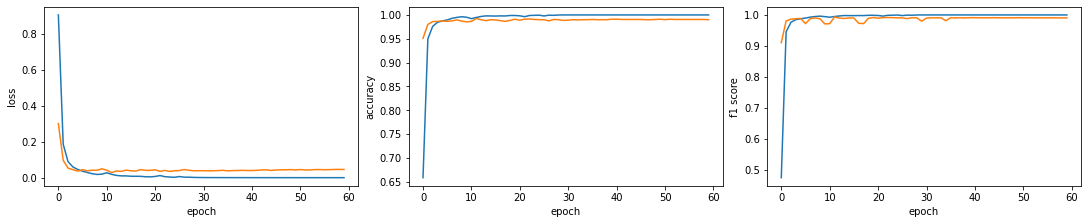

In [3]:
# 시각화
# 손실, 정확도 그래프
plt.subplots(figsize=(15, 3), constrained_layout=True)
plt.subplot(1, 3, 1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(after_data.history['loss'])
plt.plot(after_data.history['val_loss'])
plt.subplot(1, 3, 2)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(after_data.history['accuracy'])
plt.plot(after_data.history['val_accuracy'])
plt.subplot(1, 3, 3)
plt.xlabel('epoch')
plt.ylabel('f1 score')
plt.plot(after_data.history['f1_m'])
plt.plot(after_data.history['val_f1_m'])

plt.show()


In [4]:
# 2번째 모델
# 모델 구성 (multi-class classification)
second_model = Sequential()

# 은닉층 1개, 32개의 node / 출력층 4개
second_model.add(Dense(32, activation='relu', input_shape=(col,)))
second_model.add(Dense(5, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
second_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

# 모델 training
second_after_data = second_model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = second_model.predict(test_x_scaled)
second_model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
second_model.save("trained_models/second_modeL_one_hidden_depth.h5")


Epoch 1/60
61/61 [==============================] - 0s 3ms/step - loss: 1.2560 - accuracy: 0.5869 - recall_m: 0.1140 - precision_m: 0.5994 - f1_m: 0.1833 - val_loss: 0.8114 - val_accuracy: 0.8737 - val_recall_m: 0.3338 - val_precision_m: 0.8771 - val_f1_m: 0.4820
Epoch 2/60
61/61 [==============================] - 0s 800us/step - loss: 0.6545 - accuracy: 0.8411 - recall_m: 0.6096 - precision_m: 0.9220 - f1_m: 0.7285 - val_loss: 0.4911 - val_accuracy: 0.9201 - val_recall_m: 0.8017 - val_precision_m: 0.9336 - val_f1_m: 0.8620
Epoch 3/60
61/61 [==============================] - 0s 823us/step - loss: 0.4372 - accuracy: 0.8931 - recall_m: 0.8257 - precision_m: 0.9258 - f1_m: 0.8724 - val_loss: 0.3559 - val_accuracy: 0.9286 - val_recall_m: 0.8732 - val_precision_m: 0.9338 - val_f1_m: 0.9022
Epoch 4/60
61/61 [==============================] - 0s 736us/step - loss: 0.3332 - accuracy: 0.9132 - recall_m: 0.8789 - precision_m: 0.9328 - f1_m: 0.9048 - val_loss: 0.2771 - val_accuracy: 0.9421 - val_

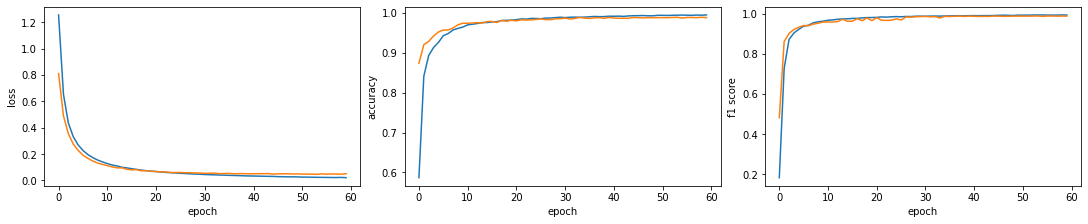

In [5]:
# 시각화
# 손실, 정확도 그래프
plt.subplots(figsize=(15, 3), constrained_layout=True)
plt.subplot(1, 3, 1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(second_after_data.history['loss'])
plt.plot(second_after_data.history['val_loss'])
plt.subplot(1, 3, 2)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(second_after_data.history['accuracy'])
plt.plot(second_after_data.history['val_accuracy'])
plt.subplot(1, 3, 3)
plt.xlabel('epoch')
plt.ylabel('f1 score')
plt.plot(second_after_data.history['f1_m'])
plt.plot(second_after_data.history['val_f1_m'])

plt.show()


In [6]:
# 3번째 모델
# 모델 구성 (multi-class classification)
third_model = Sequential()

# 은닉층 노드 128개, 2개의 층 / 출력층 4개
third_model.add(Dense(128, activation='relu', input_shape=(col,)))
# third_model.add(Dropout(0.5))
third_model.add(Dense(128, activation='relu', input_shape=(col,)))
# third_model.add(Dropout(0.5))
third_model.add(Dense(5, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
third_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

# 모델 training
third_after_data = third_model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = third_model.predict(test_x_scaled)
third_model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
third_model.save("trained_models/third_model_two_hidden_depth.h5")



Epoch 1/60
61/61 [==============================] - 0s 3ms/step - loss: 0.5472 - accuracy: 0.8439 - recall_m: 0.6778 - precision_m: 0.8772 - f1_m: 0.7317 - val_loss: 0.1628 - val_accuracy: 0.9646 - val_recall_m: 0.9581 - val_precision_m: 0.9729 - val_f1_m: 0.9654
Epoch 2/60
61/61 [==============================] - 0s 920us/step - loss: 0.1303 - accuracy: 0.9666 - recall_m: 0.9585 - precision_m: 0.9712 - f1_m: 0.9648 - val_loss: 0.0825 - val_accuracy: 0.9765 - val_recall_m: 0.9762 - val_precision_m: 0.9799 - val_f1_m: 0.9780
Epoch 3/60
61/61 [==============================] - 0s 941us/step - loss: 0.0827 - accuracy: 0.9759 - recall_m: 0.9732 - precision_m: 0.9779 - f1_m: 0.9755 - val_loss: 0.0572 - val_accuracy: 0.9880 - val_recall_m: 0.9862 - val_precision_m: 0.9905 - val_f1_m: 0.9883
Epoch 4/60
61/61 [==============================] - 0s 896us/step - loss: 0.0635 - accuracy: 0.9821 - recall_m: 0.9797 - precision_m: 0.9833 - f1_m: 0.9815 - val_loss: 0.0605 - val_accuracy: 0.9795 - val_

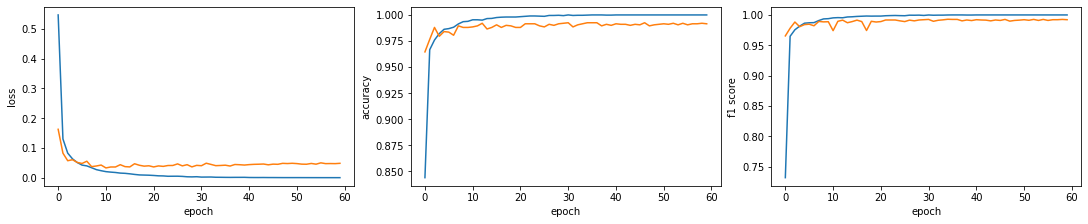

In [7]:
# 시각화
# 손실, 정확도 그래프
plt.subplots(figsize=(15, 3), constrained_layout=True)
plt.subplot(1, 3, 1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(third_after_data.history['loss'])
plt.plot(third_after_data.history['val_loss'])
plt.subplot(1, 3, 2)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(third_after_data.history['accuracy'])
plt.plot(third_after_data.history['val_accuracy'])
plt.subplot(1, 3, 3)
plt.xlabel('epoch')
plt.ylabel('f1 score')
plt.plot(third_after_data.history['f1_m'])
plt.plot(third_after_data.history['val_f1_m'])

plt.show()


In [8]:
# 4번째 모델
# 모델 구성 (multi-class classification)
fourth_model = Sequential()

# 은닉층 노드 64개, 1개의 층 / 출력층 4개
fourth_model.add(Dense(64, activation='relu', input_shape=(col,)))
fourth_model.add(Dense(5, activation='softmax'))

# 모델 최적화 및 손실 함수 알고리즘 지정
# adam, crossentropy
fourth_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', recall_m, precision_m, f1_m])

# 모델 training
fourth_after_data = fourth_model.fit(learn_x_scaled, learn_y, batch_size=100, epochs=60, validation_data=(valid_x_scaled, valid_y))

# 모델 test (predict)
print()
predict_result = fourth_model.predict(test_x_scaled)
fourth_model.evaluate(test_x_scaled, test_y)
test_correct = 0
for i in range(len(test_y)):
    # print(test_y[i].argmax(), end=' ')
    # print(predict_result[i].argmax())
    if test_y[i].argmax() == predict_result[i].argmax():
        test_correct += 1
print(f"test result correct percent : {test_correct/len(test_y) * 100:.2f}%")
fourth_model.save("trained_models/fourth_modeL_one_hidden_depth.h5")


Epoch 1/60
61/61 [==============================] - 0s 3ms/step - loss: 1.0157 - accuracy: 0.6583 - recall_m: 0.3114 - precision_m: 0.6976 - f1_m: 0.4013 - val_loss: 0.5715 - val_accuracy: 0.9226 - val_recall_m: 0.7097 - val_precision_m: 0.9605 - val_f1_m: 0.8111
Epoch 2/60
61/61 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8898 - recall_m: 0.8152 - precision_m: 0.9269 - f1_m: 0.8664 - val_loss: 0.3098 - val_accuracy: 0.9466 - val_recall_m: 0.9152 - val_precision_m: 0.9658 - val_f1_m: 0.9397
Epoch 3/60
61/61 [==============================] - 0s 902us/step - loss: 0.2918 - accuracy: 0.9206 - recall_m: 0.8960 - precision_m: 0.9351 - f1_m: 0.9150 - val_loss: 0.2147 - val_accuracy: 0.9601 - val_recall_m: 0.9495 - val_precision_m: 0.9698 - val_f1_m: 0.9595
Epoch 4/60
61/61 [==============================] - 0s 887us/step - loss: 0.2204 - accuracy: 0.9377 - recall_m: 0.9255 - precision_m: 0.9488 - f1_m: 0.9369 - val_loss: 0.1656 - val_accuracy: 0.9705 - val_re

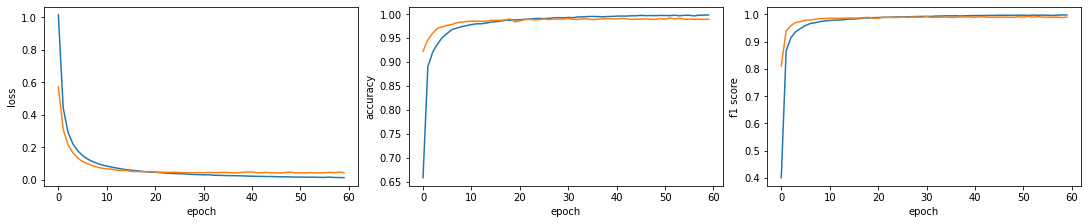

In [9]:
# 시각화
# 손실, 정확도 그래프
plt.subplots(figsize=(15, 3), constrained_layout=True)
plt.subplot(1, 3, 1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(fourth_after_data.history['loss'])
plt.plot(fourth_after_data.history['val_loss'])
plt.subplot(1, 3, 2)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(fourth_after_data.history['accuracy'])
plt.plot(fourth_after_data.history['val_accuracy'])
plt.subplot(1, 3, 3)
plt.xlabel('epoch')
plt.ylabel('f1 score')
plt.plot(fourth_after_data.history['f1_m'])
plt.plot(fourth_after_data.history['val_f1_m'])

plt.show()
